In [1]:
import numpy as np
import keras
from keras.layers.core import RepeatVector
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Dropout, Activation,LSTM,TimeDistributed
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction import image
%matplotlib inline
from keras.utils import plot_model


Using TensorFlow backend.
/home/retief/anaconda3/envs/envSKA3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Settings
max_words = 1000
batch_size = 150
epochs = 5

In [3]:
#Loading data
print('Loading data...')
data_text = np.load('./data/SAXED_TEST_MP_PXX_20160302_000000_IMAGE_25_days.npy')
data_label = np.load('./data/SAXED_TEST_MP_PXX_20160302_00000_MASK_25_days.npy')

# data_text = np.array(data_text)
# data_label = np.array(data_label)
# #convert to matrix of shape (276,1000)
# data_text = data_text.flatten().astype(str);
# np.shape(data_label)
np.shape(np.array(data_text))

Loading data...


(276, 87500)

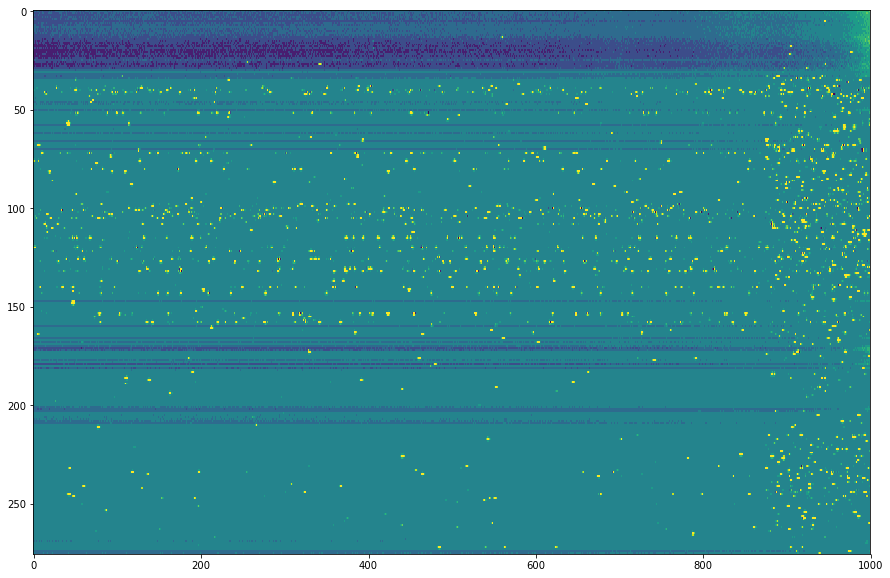

In [4]:
fig=plt.figure(figsize=(15,10))
plt.imshow(data_text[0:,0:1000],aspect='auto')

In [5]:

patches_data = image.extract_patches_2d(np.array(data_text)[:,0:10000], (276,2))
patches_label = image.extract_patches_2d(np.array(data_label)[:,0:10000], (276,2))
patches_data.shape

(9999, 276, 2)

In [6]:
# plt.imshow(patches_label[1])

In [7]:
# data_image_sax = np.swapaxes(patches_data,0,2).shape
# data_image_mask = np.swapaxes(patches_data,0,2).shape

In [8]:
#Split in data and labels into testing and training
x_train, x_test, y_train, y_test = train_test_split(patches_data, patches_label, test_size=0.30, random_state=0)

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')


6999 train sequences
3000 test sequences


In [9]:
length = patches_data.shape[1]
n_neurons = length
n_batch = 100
n_epoch = 1

In [10]:
 patches_data.shape[0]

9999

In [11]:
print('Building model...')
model = Sequential()
model.add(LSTM(n_neurons,
               input_shape=(patches_data.shape[1], patches_data.shape[2]),
               return_sequences=True
              ))

model.add(TimeDistributed(Dense( patches_data.shape[2])))
model.add(Dropout(0.5))
model.add(Activation('sigmoid'))


Building model...


In [12]:

sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=False)
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1
                   )
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('\n')
print('Test score:', score[0])
print('Test accuracy:', score[1])


Train on 6299 samples, validate on 700 samples
Epoch 1/5
6299/6299 [==============================] - 52s - loss: 0.6854 - acc: 0.4723 - val_loss: 0.6742 - val_acc: 0.7231

In [92]:
data_test_image = np.load('./data/SAXED_TEST_MP_PXX_20160302_000000_IMAGE.npy')
data_test_label = np.load('./data/SAXED_TEST_MP_PXX_20160302_00000_MASK.npy')

In [95]:
patches_test_data = image.extract_patches_2d(np.array(data_test_image), (276,2))
patches_test_label = image.extract_patches_2d(np.array(data_test_label), (276,2))



In [96]:
prediction = model.predict(patches_test_data, verbose=1)

3499/3499 [==============================] - 5s     

In [97]:
def conv_to_mask(aa,t=0.5):
    a=aa.copy()
    #print(a)
    a[np.where(aa<t)]=0
    a[np.where(aa>=t)]=1
    return a

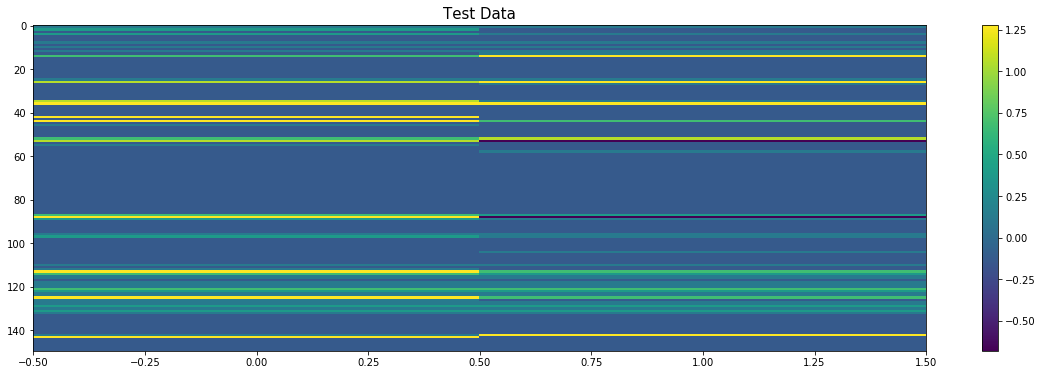

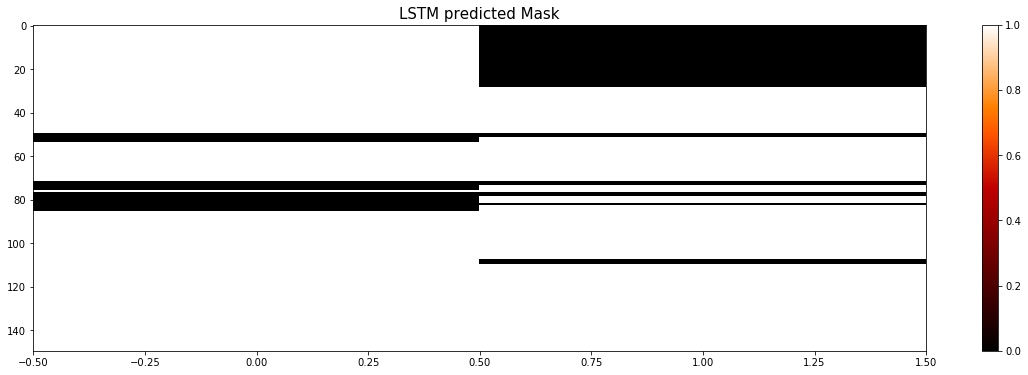

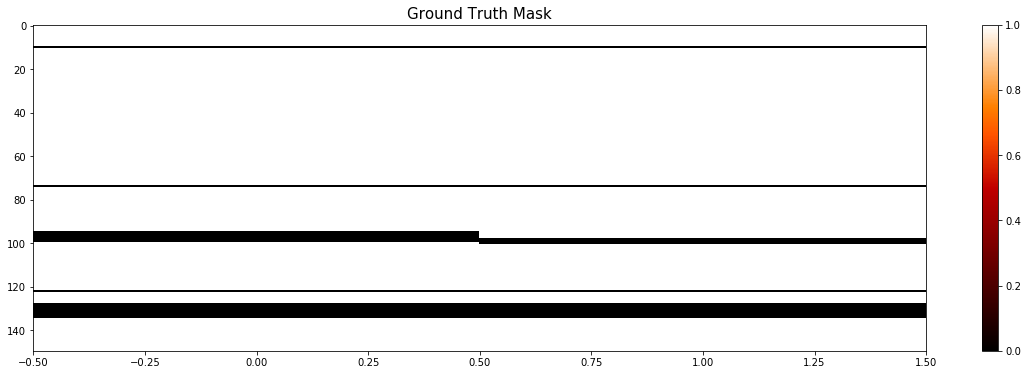

In [98]:
m=50
n=200
pp=conv_to_mask(prediction[1][m:n,:],t=0.607)
fig=plt.figure(figsize=(20,6))
img1=plt.imshow(x_train[1][m:n,:],aspect='auto')
plt.colorbar(img1)
plt.title('Test Data',fontsize=15)
fig=plt.figure(figsize=(20,6))
img2=plt.imshow(pp,aspect='auto',  cmap='gist_heat')
plt.colorbar(img2)
plt.title('LSTM predicted Mask',fontsize=15)
fig=plt.figure(figsize=(20,6))
img3=plt.imshow(y_train[1][m:n,:],aspect='auto',  cmap='gist_heat')
plt.colorbar(img3)
plt.title('Ground Truth Mask',fontsize=15)

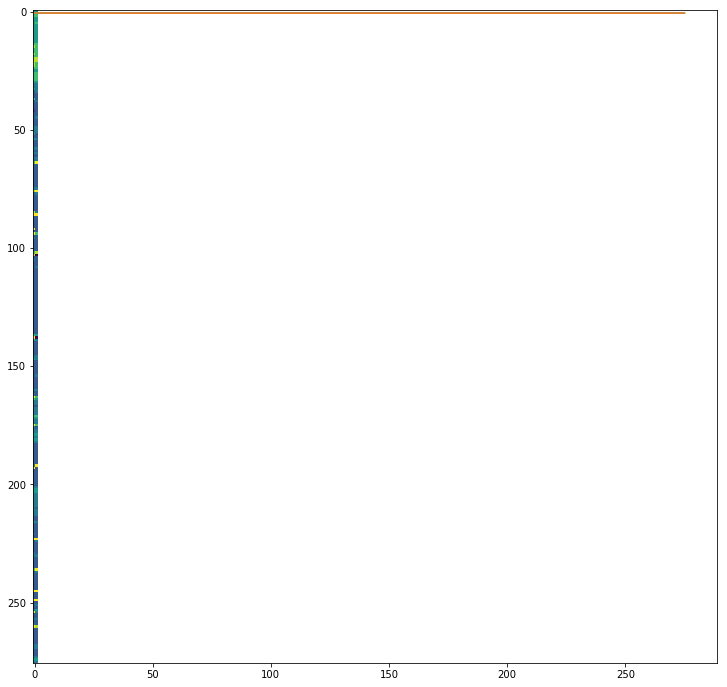

In [99]:
fig=plt.figure(figsize=(20,12))

plt.imshow(x_train[1])
plt.plot(prediction[1])